# Desafio Módulo 1: Bootcamp Analista de Machine Learning - IGTI
__Participante:__ Hernane Braga Pereira

__Enunciado:__

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Fundamentos de Machine Learning (FAM). Para este desafio será utilizada uma versão modificada do dataset “Bike Sharing” disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Esse dataset contém um conjunto de informações sobre o compartilhamento de bicicletas. Existem informações sobre as condições climáticas e dados sobre a locação das bicicletas.

## Carregando bibliotecas e dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
from sklearn.tree import DecisionTreeRegressor  


In [2]:
# Funcoes para auxiliar na analise de dataset
from IPython.display import display

def missing_data(df):    
    missing_data = pd.DataFrame({'Tipo': df.dtypes,'Dados faltantes (%)': df.isna().sum() / df.shape[0]})
    return missing_data

def sumary_df(df):
    print("Informações básicas do dataset")
    print("\nFormato:", df.shape)
    display(df.head(5))
    
    print("\nTipos de dados:")
    display(df.info())

    print("\nPercentual de dados faltantes:")
    display(missing_data(df).T)

    print("\nEstatísticas das features:")
    display(df.describe())
    
# Funcao para plotar matiz de correlacao
def plot_mtx_corr(df, var, target, q_size):
    corrmat = df.loc[:, var].corr()
    k = len(var)
    cols = corrmat.nlargest(k, target)[target].index

    fig, ax = plt.subplots(figsize=(q_size, q_size))
    sns.set(font_scale=1)
    
    cm = np.corrcoef(df[cols].values.T)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                     yticklabels=cols.values, xticklabels=cols.values, cbar_kws={"shrink": .6})


    fig.tight_layout()
    plt.show()

In [3]:
df_original = pd.read_csv("comp_bikes_mod.csv")
sumary_df(df_original)

Informações básicas do dataset

Formato: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0



Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


None


Percentual de dados faltantes:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
Tipo,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Dados faltantes (%),0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006,0.100006



Estatísticas das features:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
# Novo dataframe sem valores nulos da coluna 'dteday'
df_dteday = df_original.copy()
df_dteday = df_dteday[df_dteday['dteday'].notna()]

# Novo dataframe com a media das colunas hum, cnt e casual
df_medias = df_original.copy()

# Questão 1
1. Preencha os valores nulos das colunas `hum`,`cnt` e `casual` com os valores médios.
2. Utilize as variáveis `hum` e `casual` como independentes e a `cnt` como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

In [5]:
# Adicionando o valor de medias
df_medias['hum'].fillna(df_medias['hum'].mean(), inplace=True)
df_medias['cnt'].fillna(df_medias['cnt'].mean(), inplace=True)
df_medias['casual'].fillna(df_medias['casual'].mean(), inplace=True)


x = df_medias[['hum', 'casual']].values  #variável independente 
Y = df_medias['cnt'].values #variável dependente 

In [6]:
# Realiza a construção do modelo de regressão
reg = LinearRegression()

regressao = reg.fit(x,Y) 
previsao = reg.predict(x)

r2_linear = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2) usando regressão linear:", round(r2_linear, 3))
print("Resposta questão 1: 0.40")

Coeficiente de Determinação (R2) usando regressão linear: 0.406
Resposta questão 1: 0.40


# Questão 2
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna `dteday`. Considerendo o boxplot da variável `windspeed` (velocidade do vento) é CORRETO afirmar?

- Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
- Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
- Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
- Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

__Resposta questão 2:__ Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

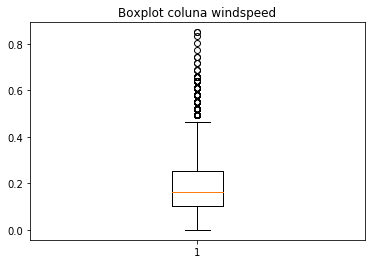

In [7]:
plt.boxplot(df_dteday['windspeed'].dropna())
plt.title("Boxplot coluna windspeed")
plt.show()

# Questão 3
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [8]:
print("Resposta questão 3:", df_original.shape)

Resposta questão 3: (17379, 17)


# Questão 4
Com base na árvore de decisão é CORRETO afirmar:

- Pode ser utilizada para classificação e regressão.
- Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão.
- A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.
- Árvore de Decisão é utilizada apenas para a classificação de dados contínuos.

__Resposta:__ Pode ser utilizada para classificação e regressão.

# Questão 5
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna `dteday`. Selecione as colunas `season`, `temp`, `atemp`, `hum`, `windspeed`. Plot a matriz de correlação. Sobre as variáveis `hum` e `cnt` é CORRETO afirmar:

- Possuem baixa correlação linear positiva.
- Possuem alta correlação linear positiva.
- Possuem alta correlação linear negativa.
- Possuem baixa correlação linear negativa.



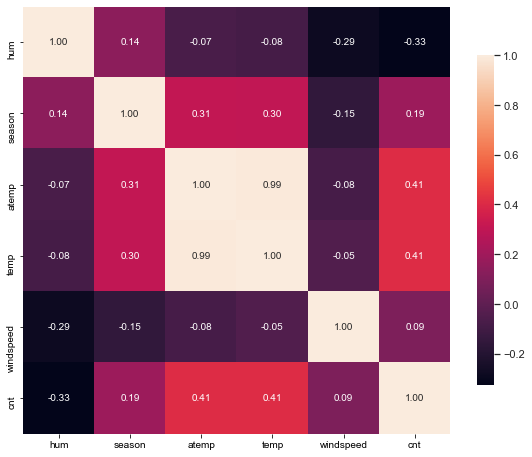

In [9]:
columns = ['season', 'temp', 'atemp', 'hum', 'windspeed','cnt']
plot_mtx_corr(df_dteday.dropna(), columns, 'hum', 8)

__Resposta questão 5:__ Possuem baixa correlação linear negativa.

# Questão 6
Qual é a proporção (em %) de valores nulos existente na coluna `temp` (temperatura ambiente normalizada)?

In [10]:
percentual = (df_original['temp'].isna().sum()/len(df_original['temp']))*100
print("Resposta questão 6:", round(percentual, 0), "%")

Resposta questão 6: 10.0 %


# Questão 7
Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:
- Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.
- valor encontrado pela árvore de decisão foi negativo.
- valor obtido pela árvore de decisão como regressor apresenta maior R2
- O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão.

__Resposta:__  valor obtido pela árvore de decisão como regressor apresenta maior R2

# Questão 8
Utilize os mesmos dados da questão anterior (`hum` e `casual` como variáveis independentes e `cnt` como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

In [11]:
x = df_medias[['hum', 'casual']].values  #variável independente 
Y = df_medias['cnt'].values #variável dependente 

arvore_regressora = DecisionTreeRegressor() 
arvore_regressora.fit(x, Y) 


#realiza a previsão
previsao_arvore = arvore_regressora.predict(x)

r2_arvore = r2_score(Y, previsao_arvore)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2) usando árvore de decisão:", round(r2_arvore, 3))
print("Resposta questão 8: 0.70")

Coeficiente de Determinação (R2) usando árvore de decisão: 0.697
Resposta questão 8: 0.70


# Questão 9
Após retirar as linhas que contém valores nulos para a coluna `dteday`, passamos a contar com quantas instancias e atributos, respectivamente?

In [12]:
print("Resposta questão 9: ", df_dteday.shape)

Resposta questão 9:  (15641, 17)


# Questão 10
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna `dteday`. Qual é o desvio padrão para os dados da coluna `windspeed` (velocidade do vento normalizada)?

In [13]:
print("Questão 10:", round(df_dteday['windspeed'].std(),3 ))

Questão 10: 0.122


# Questão 11
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna `dteday`. Qual é o valor médio para os dados da coluna `temp` (temperatura ambiente normalizada)?

In [14]:
print("Questão 11:", round(df_dteday['temp'].mean(),3 ))

Questão 11: 0.497


# Questão 12
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna `dteday`. Transforme a coluna `season` em valores categóricos. Quantas categorias diferentes existem?

In [15]:
print("Tipos de dados únicos na coluna 'season':", df_dteday['season'].unique())
print("Dados categorizados:")
new_season =  pd.get_dummies(df_dteday['season'], prefix='season')
display(new_season.head(3))
print("Resposta questão 12: 4")

Tipos de dados únicos na coluna 'season': [ 1. nan  2.  3.  4.]
Dados categorizados:


,season_1.0,season_2.0,season_3.0,season_4.0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0


Resposta questão 12: 4


# Questão 13
Quantos tipos diferentes de dados existem no dataset do desafio?

In [16]:
print("Resposta questão 13:")
print("2 tipos: object e float64")

Resposta questão 13:
2 tipos: object e float64


# Questão 14
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna `dteday`. Transforme a coluna `dteday` no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

In [17]:
df_dteday['df_dteday'] = pd.to_datetime(df_dteday['dteday'])
time_line = df_dteday['dteday'].sort_values(ascending=False)
time_line.reset_index(inplace=True, drop=True)

print("Resposta questão 14:", time_line[0])

Resposta questão 14: 2012-12-31


# Questão 15
Comparando o SVM com a árvore de decisão é CORRETO afirmar:

- Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM.
- SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.
- SVM encontra o hiperplano que gera a maior separação entre os dados.
- Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.

__Resposta:__ SVM encontra o hiperplano que gera a maior separação entre os dados.